<a href="https://colab.research.google.com/github/SamuelOliveira/Colab/blob/main/FT084_2021S1_T2_predicao_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Author: Samuel Oliveira da Silva
RA: 231294
Email: s231294@g.unicamp.br
FT084_2021S1_T2
```

### Instalando Bibliotecas
```
install.packages('MASS', dependencies = TRUE)
install.packages('caret', dependencies = TRUE)
install.packages('leaps', dependencies = TRUE)
```



In [ ]:
install.packages('MASS')
install.packages('caret')
install.packages('leaps')

### Importando Bibliotecas
```
library(MASS)
library(caret)
library(leaps)
library(ggplot2)
library(tidyverse)
```



In [15]:
library(MASS)
library(caret)
library(leaps)
library(ggplot2)
library(tidyverse)

### Inspecionando Conjunto de Dados **Boston**


1.   Análise Exploratória(Dados)
```
head(Boston)
```
2.   Distribuição de Frequência(Histograma)
```
ggplot(gather(Boston), aes(value)) + 
    geom_histogram(bins = 10) + 
    facet_wrap(~key, scales = 'free_x')
```

In [3]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


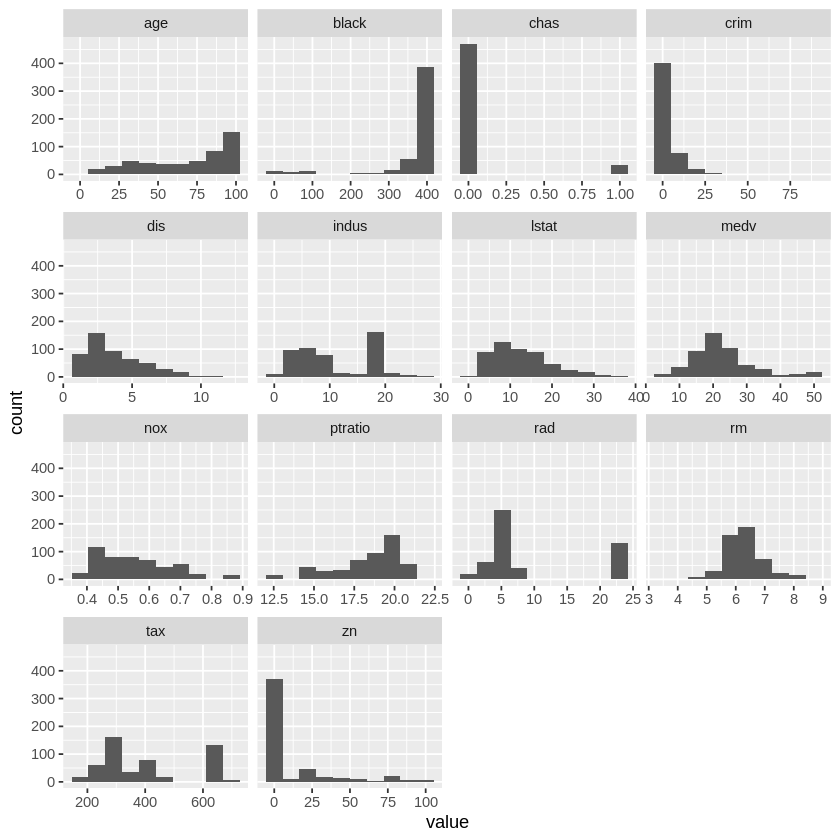

In [4]:
ggplot(gather(Boston), aes(value)) + 
    geom_histogram(bins = 10) + 
    facet_wrap(~key, scales = 'free_x')

### Criando Subconjuntos

*   Teste (100 observações)
*   Treino (406 observações)
*   Modelo de Treino
```
split <-sample(nrow(Boston), 100)
Boston.test  <-Boston[split,]
Boston.train <-Boston[-split,]
model.train <-regsubsets(medv~., data=Boston.train, nvmax=13)
model.train.sum <-summary(model.train)
```



In [5]:
# Criando Subconjuntos
split <-sample(nrow(Boston), 100)
Boston.test  <-Boston[split,]
Boston.train <-Boston[-split,]

# Criando Modelo de Treino
model.train <-regsubsets(medv~., data=Boston.train, nvmax=13)
model.train.sum <-summary(model.train)

### **a.** Selecionando Melhor Conjunto de Atributos
**(a)** Use a função regsubsets() para encontrar o melhor conjunto de  atributos. Qual é o melhor modelo de acordo com as medidas **Cp**, **BIC**, and **R2** ajustado? Mostre gráficos para dar suporte a sua resposta e mostre os coeficientes do melhor modelo.


1.   **Cp**, **BIC**, and **R2** ajustado
2.   Gráficos
3.   Coeficientes



In [6]:
# Cp, BIC, R2 ajustado
data.frame(
  CP = which.min(model.train.sum$cp),
  BIC = which.min(model.train.sum$bic),
  Adj.R2 = which.max(model.train.sum$adjr2)
)

CP,BIC,Adj.R2
<int>,<int>,<int>
11,7,11


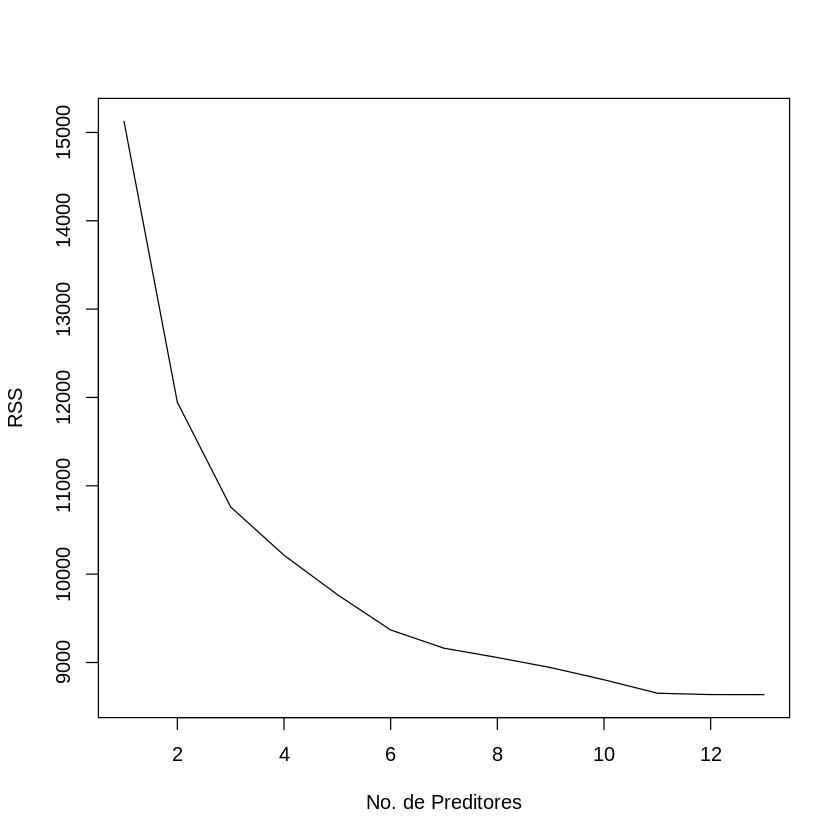

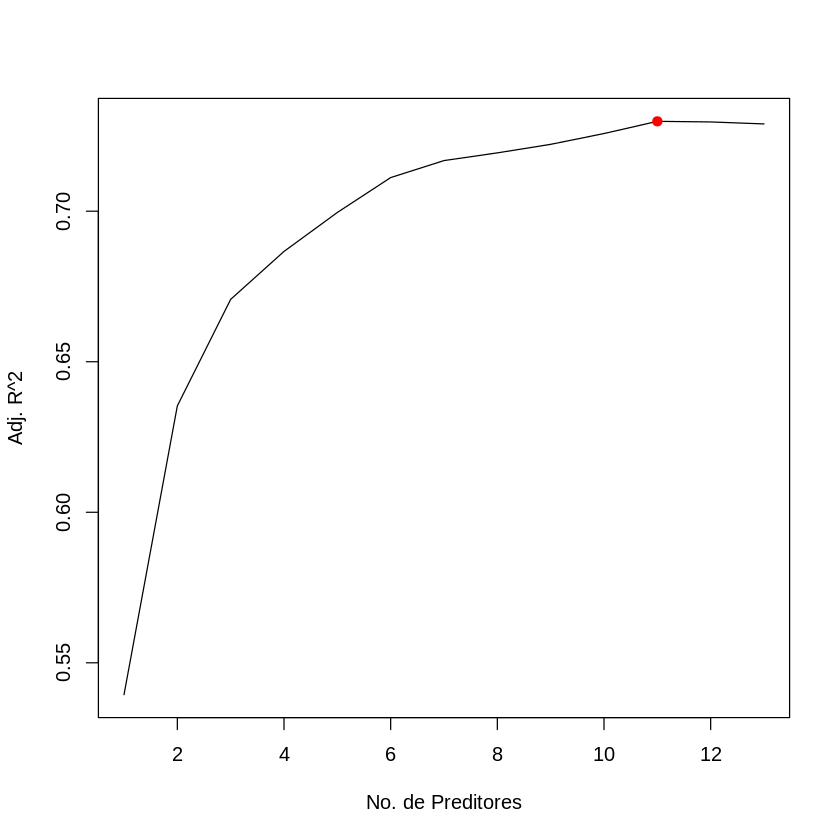

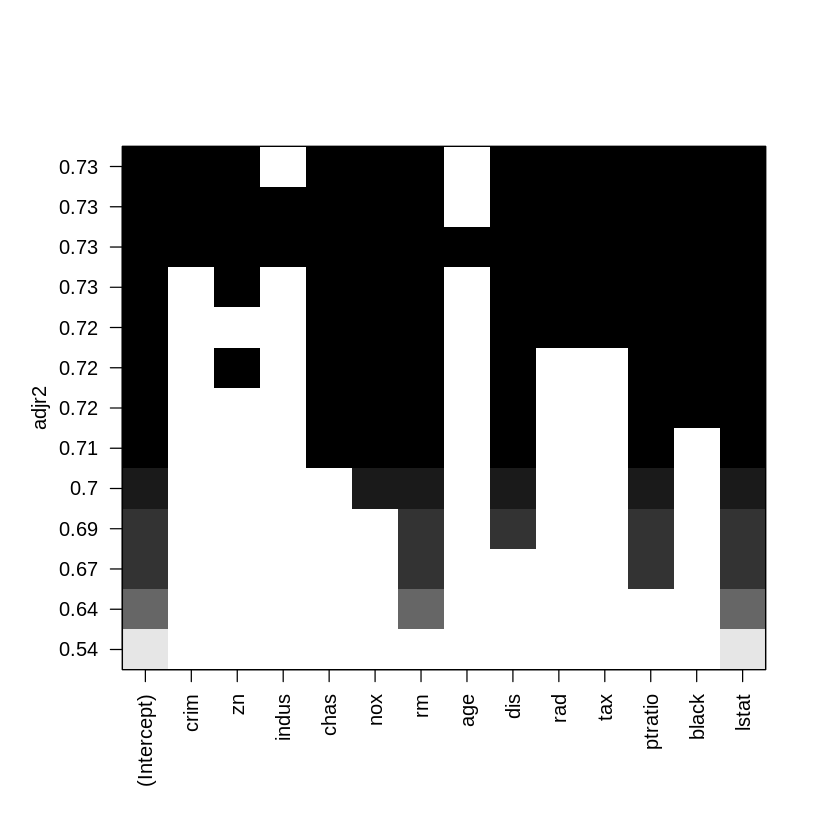

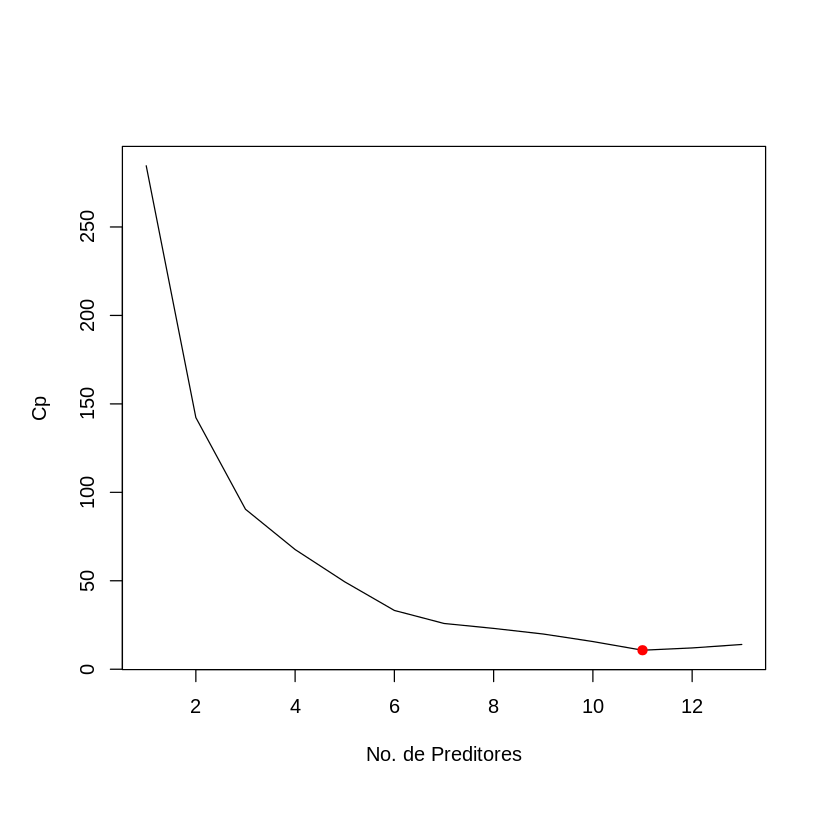

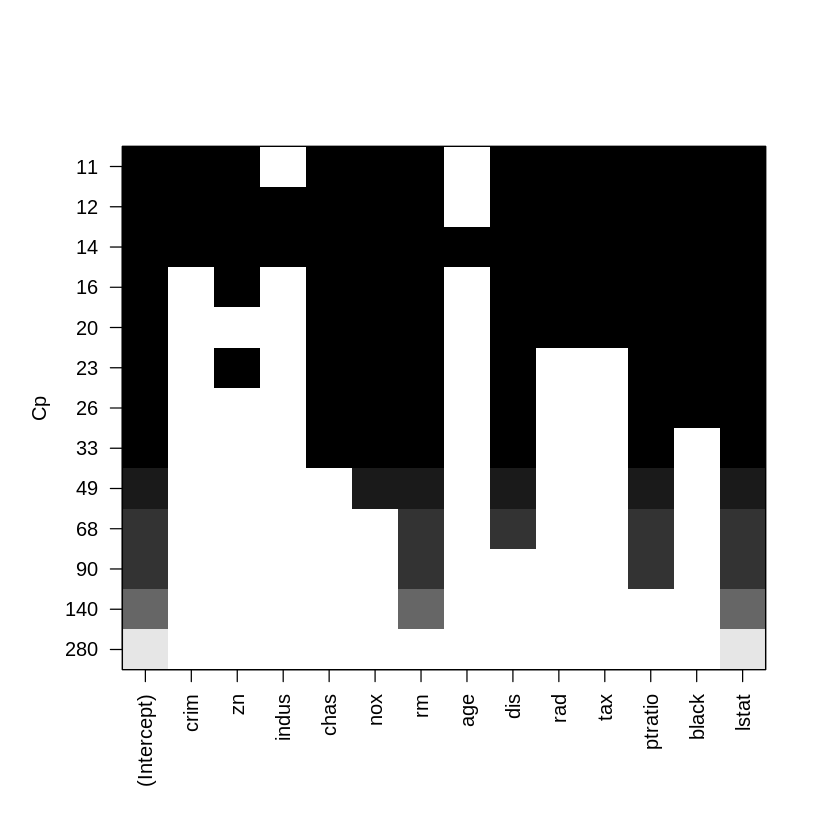

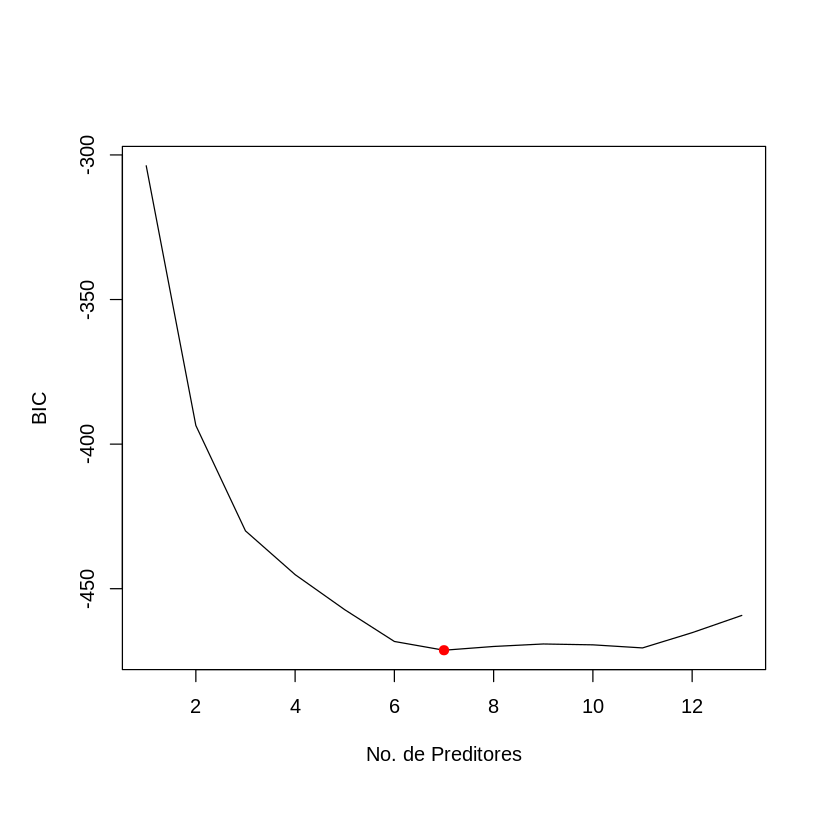

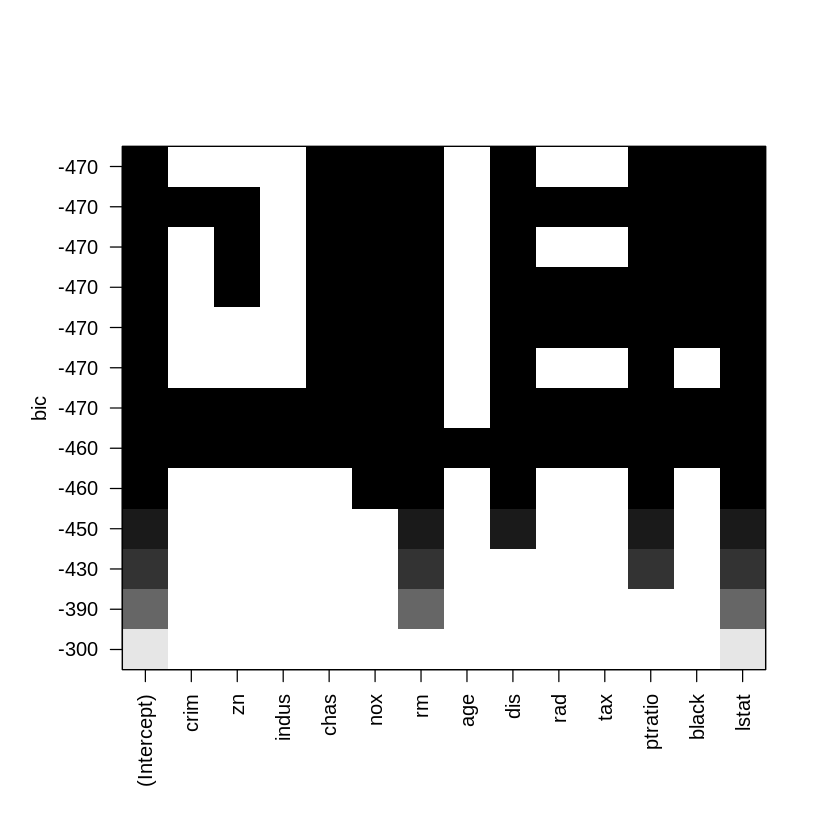

In [7]:
# Gráficos

    # Com isso em mente, realizaremos gráficos para r ao quadrado ajustado,
    # Cp e Critério de Informação Bayesiano.
    # Uma vez plotados, podemos determinar os melhores modelos para cada método
    # usando o melhor desempenho com a menor quantidade de variáveis.
    # Para o r quadrado ajustado, usaremos o maior valor,
    # enquanto para os outros será usado o menor valor.
    # Depois, podemos comparar os resultados para determinar
    # o melhor número de variáveis ​​comuns usadas.

# RSS
plot(model.train.sum$rss,xlab='No. de Preditores',ylab='RSS',type='l')

# R2 ajustado
plot(model.train.sum$adjr2,xlab='No. de Preditores',ylab='Adj. R^2',type='l')
max_p = which.max(model.train.sum$adjr2)
points(max_p,model.train.sum$adjr2[max_p],pch=19,col='red')
plot(model.train,scale='adjr2')

# Cp
plot(model.train.sum$cp,xlab='No. de Preditores',ylab='Cp',type='l')
min_p = which.min(model.train.sum$cp)
points(min_p,model.train.sum$cp[min_p],pch=19,col='red')
plot(model.train,scale='Cp')

# BIC
plot(model.train.sum$bic,xlab='No. de Preditores',ylab='BIC',type='l')
min_p = which.min(model.train.sum$bic)
points(min_p,model.train.sum$bic[min_p],pch=19,col='red')
plot(model.train,scale='bic')

In [8]:
# Coeficientes

best.var <-which.max(model.train.sum$adjr2)
cat("Melhor número de variáveis ​​comuns usadas: ", best.var,"\n")
cat("\n")

model.train.coef <-coef(model.train,best.var)

print(model.train.coef)


Melhor número de variáveis ​​comuns usadas:  11 

  (Intercept)          crim            zn          chas           nox 
 36.508291246  -0.106599881   0.041726533   3.500117659 -15.347903436 
           rm           dis           rad           tax       ptratio 
  3.595387882  -1.503771906   0.289732913  -0.012121141  -0.891467847 
        black         lstat 
  0.008502979  -0.574938189 


### **b.** Seleção Progressiva e Seleção Regressiva
**(b)** Repita o procedimento em **(a)**, usando seleção progressiva e seleção regressiva. Como sua resposta agora se compara aos resultados do item **(a)**?


1.   Seleção Progressiva
2.   Seleção Regressiva
3.   Repita o procedimento feito em **(a)**
  *   **Cp**, **BIC**, and **R2** ajustado
  *   Gráficos
  *   Coeficientes


In [9]:
# Seleção Progressiva
Boston.train.fwd <- regsubsets(medv~.,data=Boston.train,nvmax=13,method='forward')
Boston.train.fwd.sum <- summary(Boston.train.fwd)
cat("\n")
# Seleção Regressiva
Boston.train.bwk <- regsubsets(medv~.,data=Boston.train,nvmax=13,method='backward')
Boston.train.bwk.sum <- summary(Boston.train.bwk)

In [10]:
# Repita o procedimento feito em **(a)**

# Seleção Progressiva = Cp, BIC, R2 ajustado
cat("Seleção Progressiva = Cp, BIC, R2 ajustado\n\n")
data.frame(
  CP = which.min(Boston.train.fwd.sum$cp),
  BIC = which.min(Boston.train.fwd.sum$bic),
  Adj.R2 = which.max(Boston.train.fwd.sum$adjr2)
)
cat("\n\n")
# Seleção Regressiva = Cp, BIC, R2 ajustado
cat("Seleção Regressiva = Cp, BIC, R2 ajustado\n\n")
data.frame(
  CP = which.min(Boston.train.bwk.sum$cp),
  BIC = which.min(Boston.train.bwk.sum$bic),
  Adj.R2 = which.max(Boston.train.bwk.sum$adjr2)
)

Seleção Progressiva = Cp, BIC, R2 ajustado



CP,BIC,Adj.R2
<int>,<int>,<int>
11,7,11




Seleção Regressiva = Cp, BIC, R2 ajustado



CP,BIC,Adj.R2
<int>,<int>,<int>
11,7,11


Seleção Progressiva = Gráficos


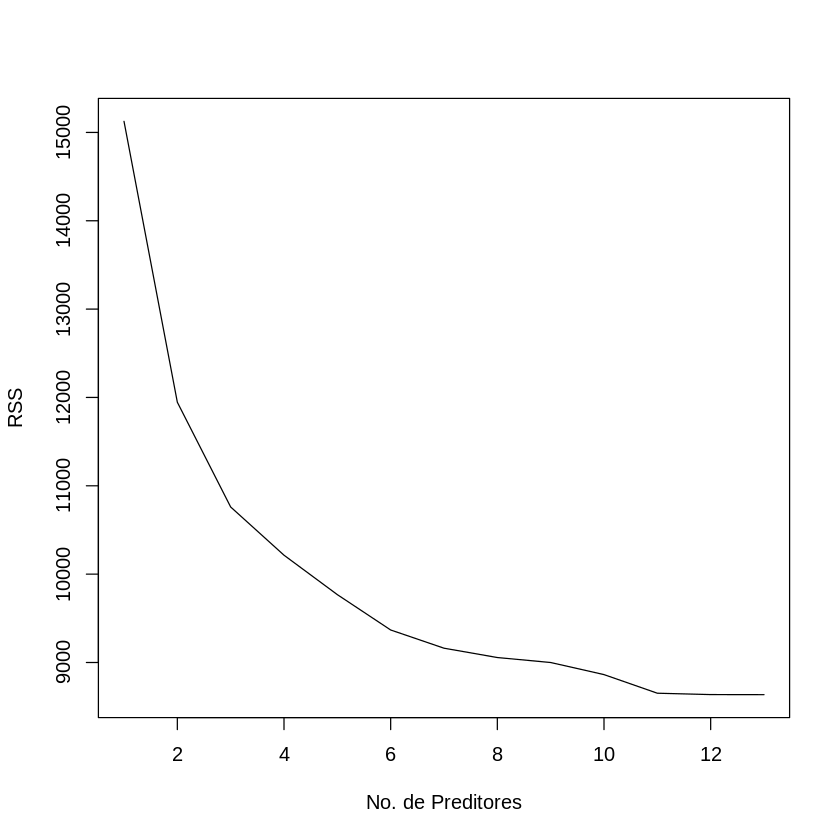

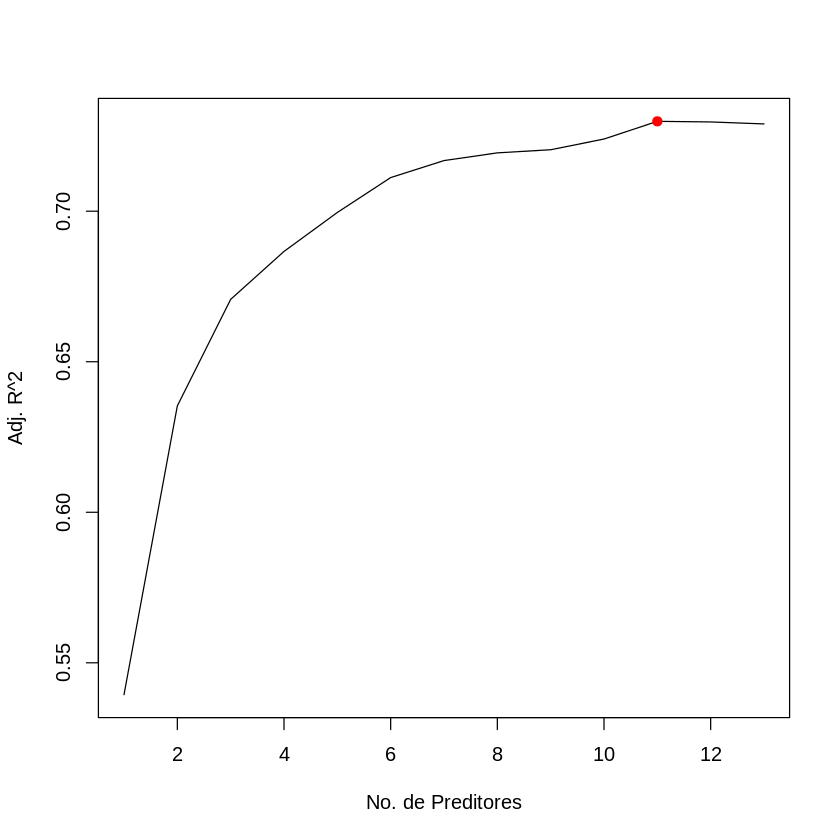

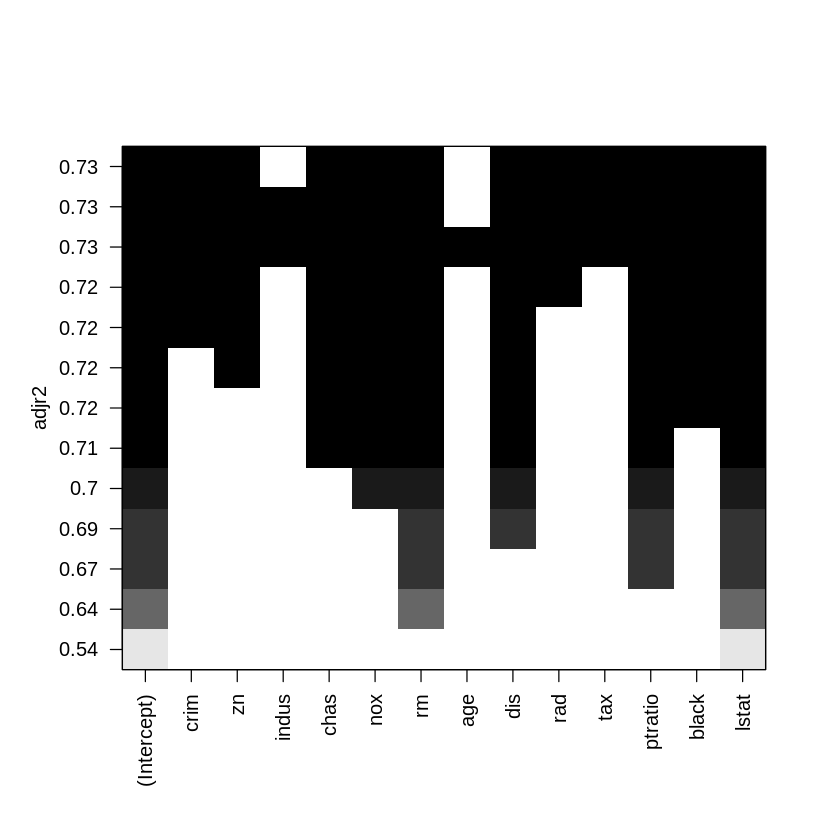

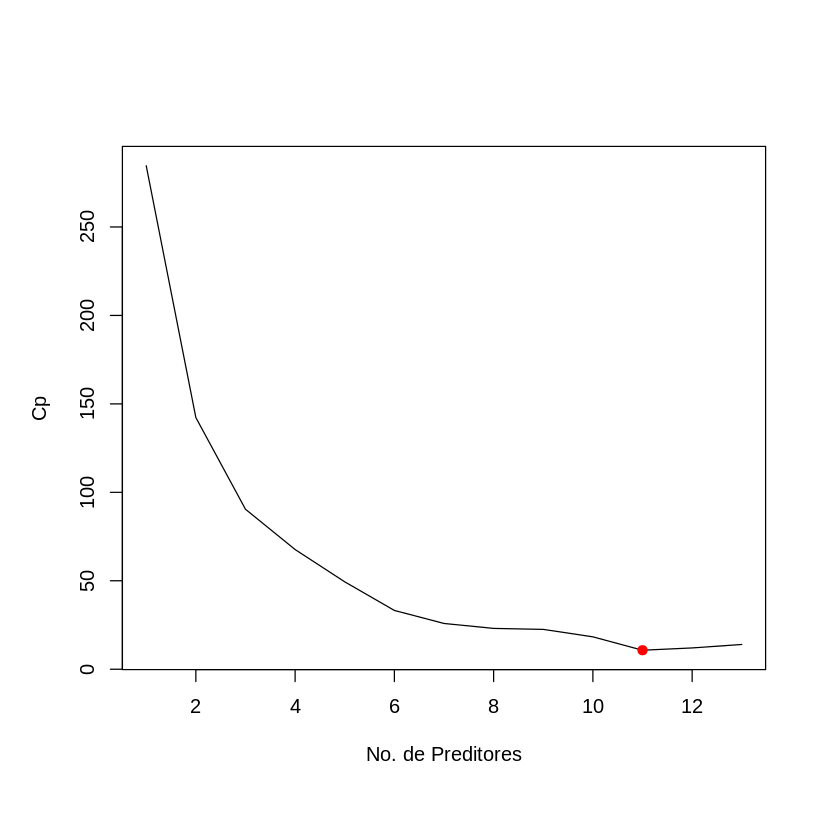

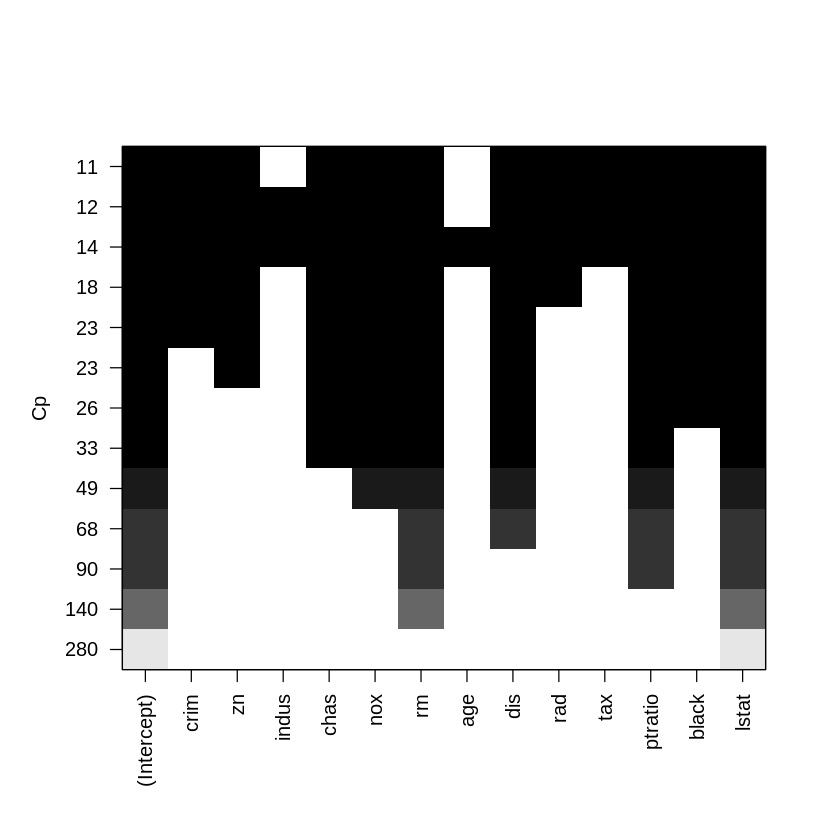

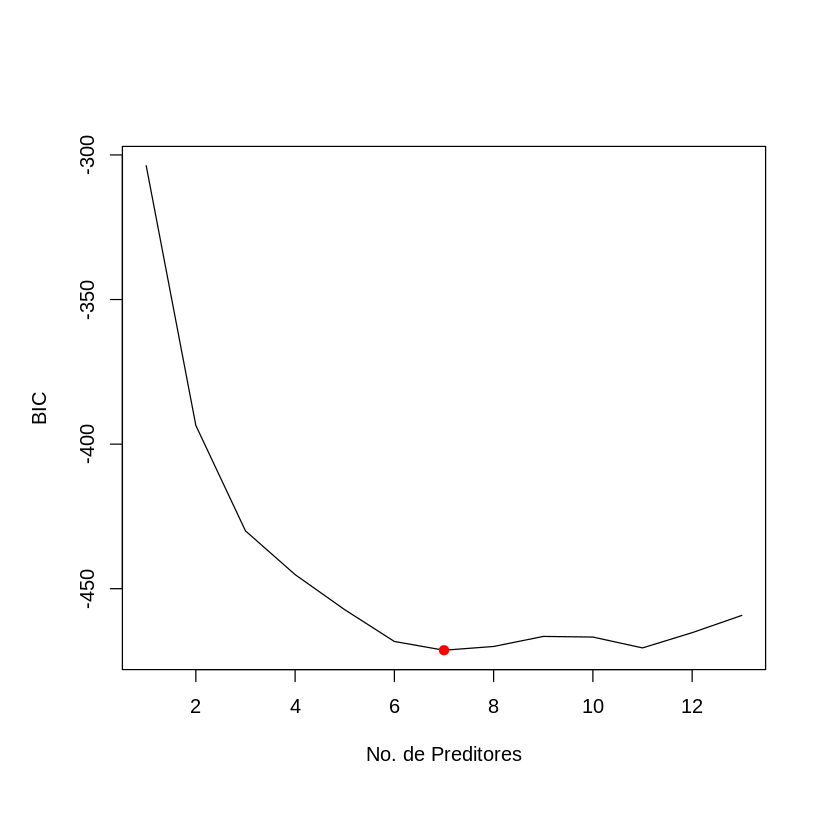



Seleção Regressiva = Gráficos


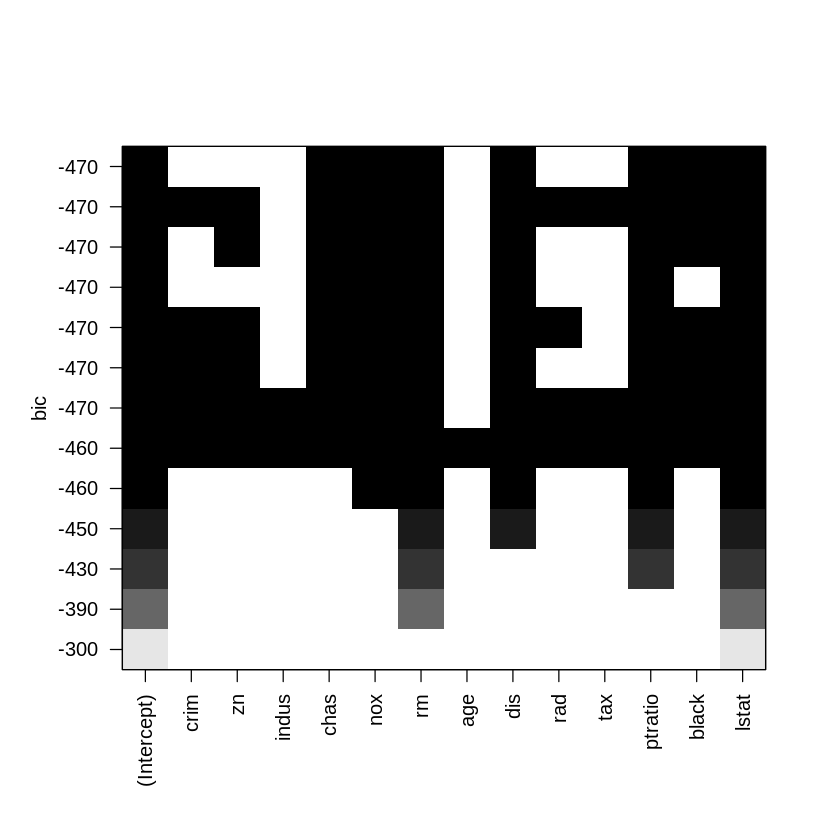

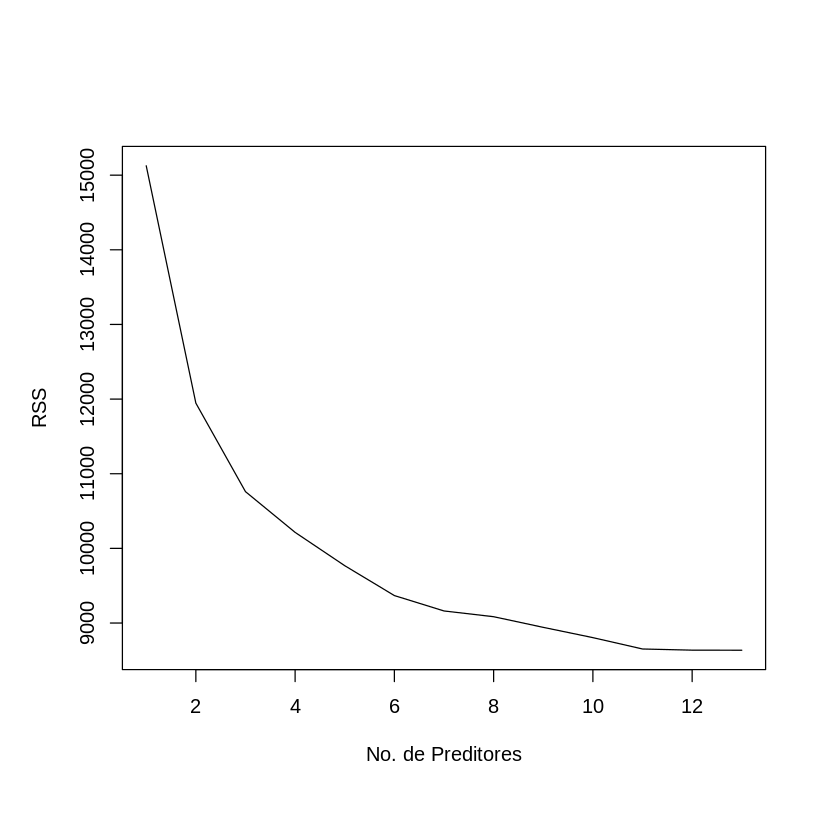

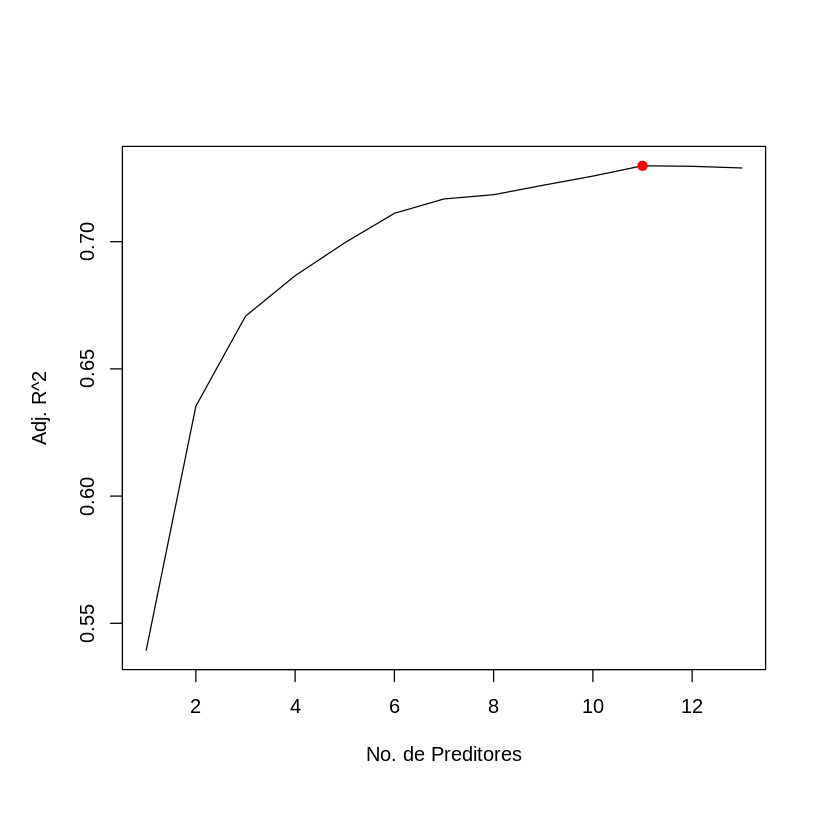

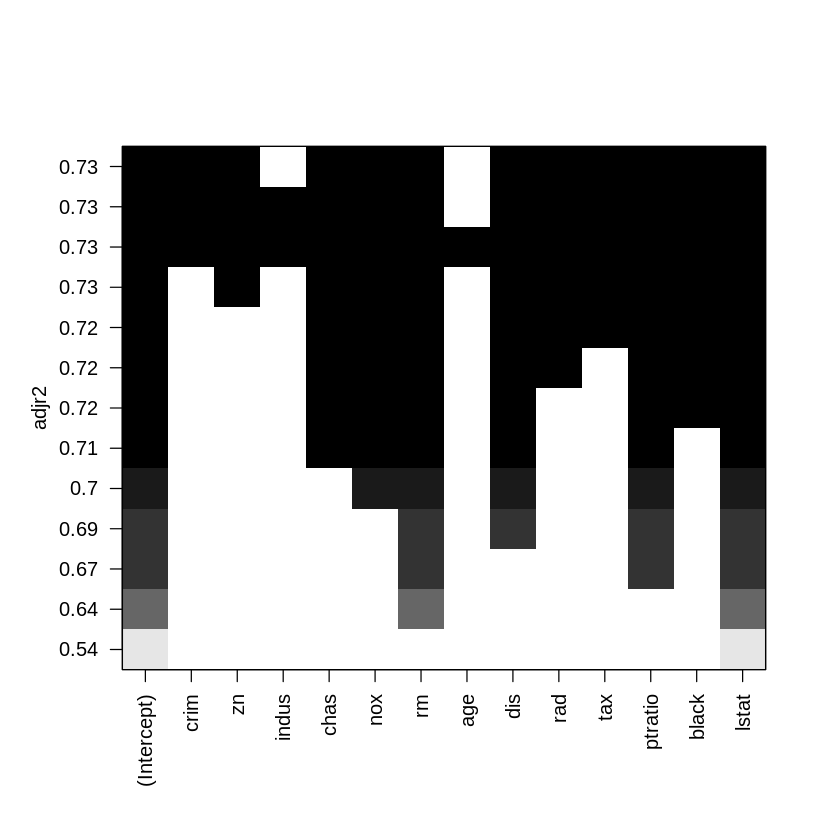

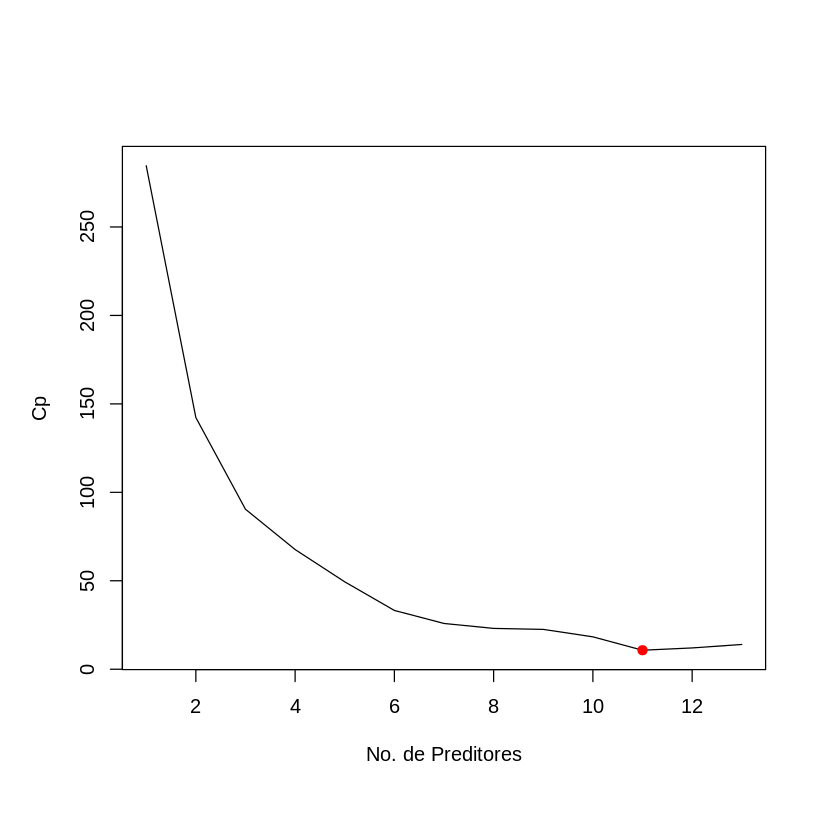

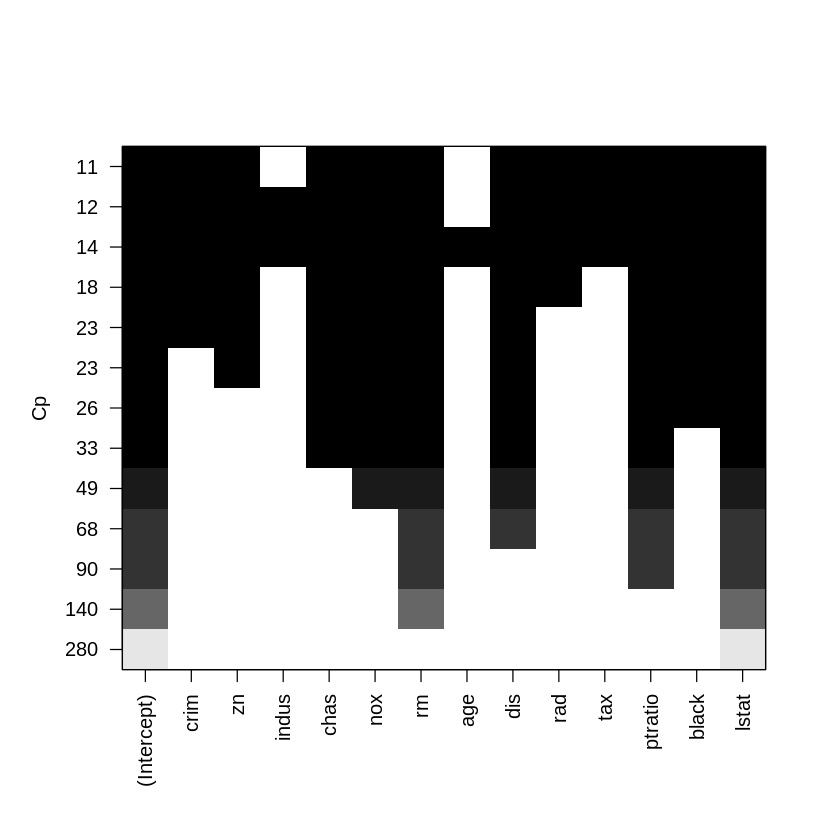

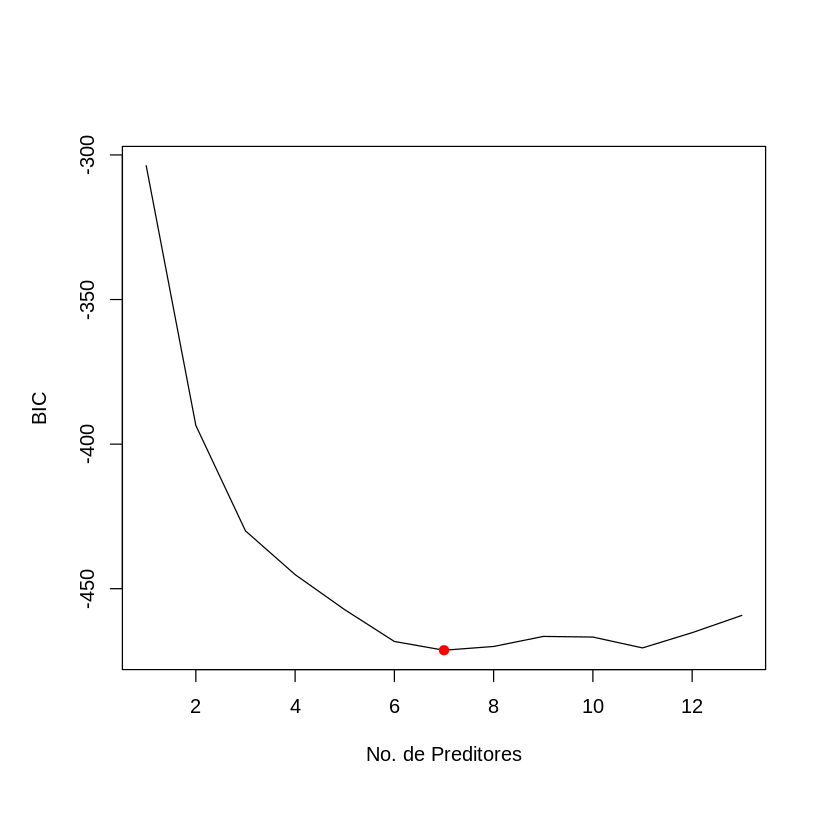

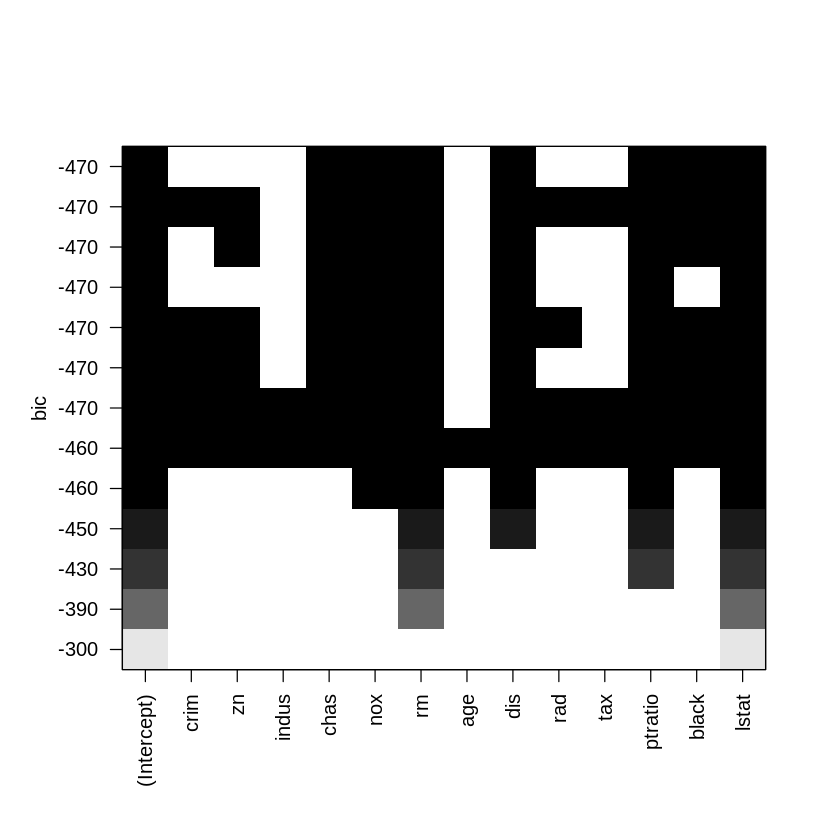

In [11]:
# Gráficos

    # Com isso em mente, realizaremos gráficos para r ao quadrado ajustado,
    # Cp e Critério de Informação Bayesiano.
    # Uma vez plotados, podemos determinar os melhores modelos para cada método
    # usando o melhor desempenho com a menor quantidade de variáveis.
    # Para o r quadrado ajustado, usaremos o maior valor,
    # enquanto para os outros será usado o menor valor.
    # Depois, podemos comparar os resultados para determinar
    # o melhor número de variáveis ​​comuns usadas.

cat("Seleção Progressiva = Gráficos\n")
# RSS
plot(Boston.train.fwd.sum$rss,xlab='No. de Preditores',ylab='RSS',type='l')

# R2 ajustado
plot(Boston.train.fwd.sum$adjr2,xlab='No. de Preditores',ylab='Adj. R^2',type='l')
max_p = which.max(Boston.train.fwd.sum$adjr2)
points(max_p,Boston.train.fwd.sum$adjr2[max_p],pch=19,col='red')
plot(Boston.train.fwd,scale='adjr2')

# Cp
plot(Boston.train.fwd.sum$cp,xlab='No. de Preditores',ylab='Cp',type='l')
min_p = which.min(Boston.train.fwd.sum$cp)
points(min_p,Boston.train.fwd.sum$cp[min_p],pch=19,col='red')
plot(Boston.train.fwd,scale='Cp')

# BIC
plot(Boston.train.fwd.sum$bic,xlab='No. de Preditores',ylab='BIC',type='l')
min_p = which.min(Boston.train.fwd.sum$bic)
points(min_p,Boston.train.fwd.sum$bic[min_p],pch=19,col='red')
plot(Boston.train.fwd,scale='bic')

cat("\n\n")

cat("Seleção Regressiva = Gráficos\n")
# RSS
plot(Boston.train.bwk.sum$rss,xlab='No. de Preditores',ylab='RSS',type='l')

# R2 ajustado
plot(Boston.train.bwk.sum$adjr2,xlab='No. de Preditores',ylab='Adj. R^2',type='l')
max_p = which.max(Boston.train.bwk.sum$adjr2)
points(max_p,Boston.train.bwk.sum$adjr2[max_p],pch=19,col='red')
plot(Boston.train.bwk,scale='adjr2')

# Cp
plot(Boston.train.fwd.sum$cp,xlab='No. de Preditores',ylab='Cp',type='l')
min_p = which.min(Boston.train.fwd.sum$cp)
points(min_p,Boston.train.fwd.sum$cp[min_p],pch=19,col='red')
plot(Boston.train.fwd,scale='Cp')

# BIC
plot(Boston.train.fwd.sum$bic,xlab='No. de Preditores',ylab='BIC',type='l')
min_p = which.min(Boston.train.fwd.sum$bic)
points(min_p,Boston.train.fwd.sum$bic[min_p],pch=19,col='red')
plot(Boston.train.fwd,scale='bic')

In [12]:
# Coeficientes

best.var.fwd <-which.max(Boston.train.fwd.sum$adjr2)
cat("Seleção Progressiva - Melhor número de variáveis ​​comuns: ", best.var.fwd,"\n")
cat("\n")

Boston.train.coef.fwd <-coef(Boston.train.fwd,best.var.fwd)

print(Boston.train.coef.fwd)
cat("\n\n")

best.var.bwk <-which.max(Boston.train.bwk.sum$adjr2)
cat("Seleção Regressiva - Melhor número de variáveis ​​comuns: ", best.var.bwk,"\n")
cat("\n")

Boston.train.coef.bwk <-coef(Boston.train.bwk,best.var.bwk)

print(Boston.train.coef.bwk)

Seleção Progressiva - Melhor número de variáveis ​​comuns:  11 

  (Intercept)          crim            zn          chas           nox 
 36.508291246  -0.106599881   0.041726533   3.500117659 -15.347903436 
           rm           dis           rad           tax       ptratio 
  3.595387882  -1.503771906   0.289732913  -0.012121141  -0.891467847 
        black         lstat 
  0.008502979  -0.574938189 


Seleção Regressiva - Melhor número de variáveis ​​comuns:  11 

  (Intercept)          crim            zn          chas           nox 
 36.508291246  -0.106599881   0.041726533   3.500117659 -15.347903436 
           rm           dis           rad           tax       ptratio 
  3.595387882  -1.503771906   0.289732913  -0.012121141  -0.891467847 
        black         lstat 
  0.008502979  -0.574938189 


### **c.** Validação Cruzada **K-fold**

**(c)** Realize a seleção de variáveis e de modelos usando validação cruzada no
conjunto de treino.

In [13]:
get_model_formula <- function(id, object, outcome){
  models <- summary(object)$which[id,-1]
  predictors <- names(which(models == TRUE))
  predictors <- paste(predictors, collapse = "+")
  as.formula(paste0(outcome, "~", predictors))
}

get_cv_error <- function(model.formula, data){
  set.seed(1)
  train.control <- trainControl(method = "cv", number = 10)
  cv <- train(model.formula, data = data, method = "lm",
              trControl = train.control)
  cv$results$RMSE
}

cat("Melhor modelo com 3 variáveis:\n\n")
get_model_formula(3, model.train, "medv")

Melhor modelo com 3 variáveis:



medv ~ rm + ptratio + lstat
<environment: 0x55d74b850d98>

In [14]:
# Calcular erro de validação cruzada
model.ids <- 1:5
cv.errors <- map(model.ids, get_model_formula, model.train, "medv") %>%
  map(get_cv_error, data=Boston) %>%
  unlist()

# Seleção do modelo que minimiza o erro CV
cat(crayon::bold("Conjunto de Treino\n"),crayon::reset(" - Seleção do modelo que minimiza o erro CV: ", which.min(cv.errors),"com variáveis\n\n"))

cat("Variáveis para o melhor modelo:",which.min(cv.errors),"\n")
print(coef(model.train, which.min(cv.errors)))

Conjunto de Treino
  - Seleção do modelo que minimiza o erro CV:  5 com variáveis

Variáveis para o melhor modelo: 5 
(Intercept)         nox          rm         dis     ptratio       lstat 
 36.9712871 -15.6447644   3.9966714  -1.2146993  -0.9889752  -0.6447389 


### **d**. Discussão
**(d)** Compare os modelos obtidos nos items **(a)**, **(b)** e **(c)** no 
conjunto de teste. Qual deles é o melhor?